<a href="https://colab.research.google.com/github/ManisMalakar/Recurrent-Neural-Network/blob/main/LSTM_for_IMDB_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Data Preprocessing
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
#Loading the dataset
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=30000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [7]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153,

In [9]:
#Applying padding
x_train=pad_sequences(x_train,maxlen=1000)
x_test=pad_sequences(x_test,maxlen=100)

In [10]:
x_train.shape

(25000, 1000)

In [11]:
#Defining an object (Initialization)
model=tf.keras.models.Sequential()

In [12]:
#Adding the embedding layer
model.add(tf.keras.layers.Embedding(input_dim=30000,output_dim=128,input_shape=(100,)))

In [13]:
#Adding the LSTM Layer
model.add(tf.keras.layers.LSTM(units=128,activation='tanh'))

In [14]:
#Adding the output layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          3840000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 3,971,713
Trainable params: 3,971,713
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
#Training the model
history=model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
196/196 [==============================] - 755s 4s/step - loss: 0.5793 - accuracy: 0.7049 - val_loss: 0.4454 - val_accuracy: 0.8004
Epoch 2/10
196/196 [==============================] - 767s 4s/step - loss: 0.3059 - accuracy: 0.8804 - val_loss: 0.4641 - val_accuracy: 0.8212
Epoch 3/10
196/196 [==============================] - 764s 4s/step - loss: 0.2127 - accuracy: 0.9232 - val_loss: 0.3734 - val_accuracy: 0.8452
Epoch 4/10
196/196 [==============================] - 752s 4s/step - loss: 0.1659 - accuracy: 0.9412 - val_loss: 0.3922 - val_accuracy: 0.8412
Epoch 5/10
196/196 [==============================] - 750s 4s/step - loss: 0.1469 - accuracy: 0.9515 - val_loss: 0.3880 - val_accuracy: 0.8491
Epoch 6/10
196/196 [==============================] - 756s 4s/step - loss: 0.1126 - accuracy: 0.9598 - val_loss: 0.4807 - val_accuracy: 0.8405
Epoch 7/10
196/196 [==============================] - 735s 4s/step - loss: 0.0908 - accuracy: 0.9694 - val_loss: 0.4098 - val_accuracy: 0.8428

In [20]:
#Making Predictions
y_pred=model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
print(y_pred[10]),print(y_test[10])

[1]
1


(None, None)

In [22]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[10734  1766]
 [ 2631  9869]]


In [23]:
acc_cm=accuracy_score(y_test,y_pred)
print(acc_cm)

0.82412


In [28]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

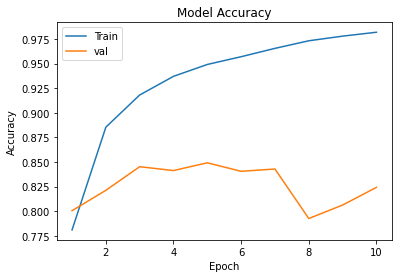

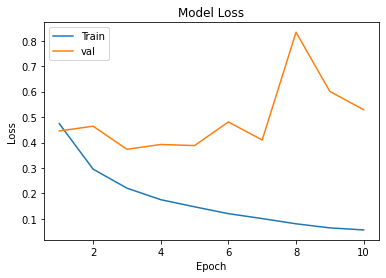

In [30]:
learning_curve(history, 10)